In [1]:
# ================================================================================
# FASE 5: ANÁLISE EXPLORATÓRIA (EDA)
# Data App - Catálogo Técnico de Rolamentos Industriais
# ================================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Configurações
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("=" * 80)
print("FASE 5: ANÁLISE EXPLORATÓRIA (EDA)")
print("=" * 80)
print()


FASE 5: ANÁLISE EXPLORATÓRIA (EDA)



In [2]:
# ===== CARREGAMENTO DE DADOS =====

products_ml = pd.read_parquet('../data/refined/products_features.parquet')
customers_ml = pd.read_parquet('../data/refined/customers_features.parquet')
sales = pd.read_parquet('../data/trusted/sales_trusted.parquet')

# Converter datas
sales['sale_date'] = pd.to_datetime(sales['sale_date'])

print("\n✓ DADOS CARREGADOS:")
print(f"  Produtos: {len(products_ml):,} registros × {len(products_ml.columns)} colunas")
print(f"  Clientes: {len(customers_ml):,} registros × {len(customers_ml.columns)} colunas")
print(f"  Vendas: {len(sales):,} registros × {len(sales.columns)} colunas")

# Verificar tipos
print(f"\n✓ PERÍODO DE VENDAS:")
print(f"  De: {sales['sale_date'].min().date()}")
print(f"  Até: {sales['sale_date'].max().date()}")
print(f"  Dias: {(sales['sale_date'].max() - sales['sale_date'].min()).days}")



✓ DADOS CARREGADOS:
  Produtos: 9,641 registros × 19 colunas
  Clientes: 5,000 registros × 19 colunas
  Vendas: 120,000 registros × 14 colunas

✓ PERÍODO DE VENDAS:
  De: 2023-01-01
  Até: 2025-12-31
  Dias: 1095



SEÇÃO 1: ANÁLISE DE PRODUTOS

1.1️⃣ DISTRIBUIÇÃO DE TIPOS DE ROLAMENTOS
bearing_type
Agujas             1960
Autocompensador    1959
Esférico           1935
Contato Angular    1913
Cilíndrico         1874
Name: count, dtype: int64


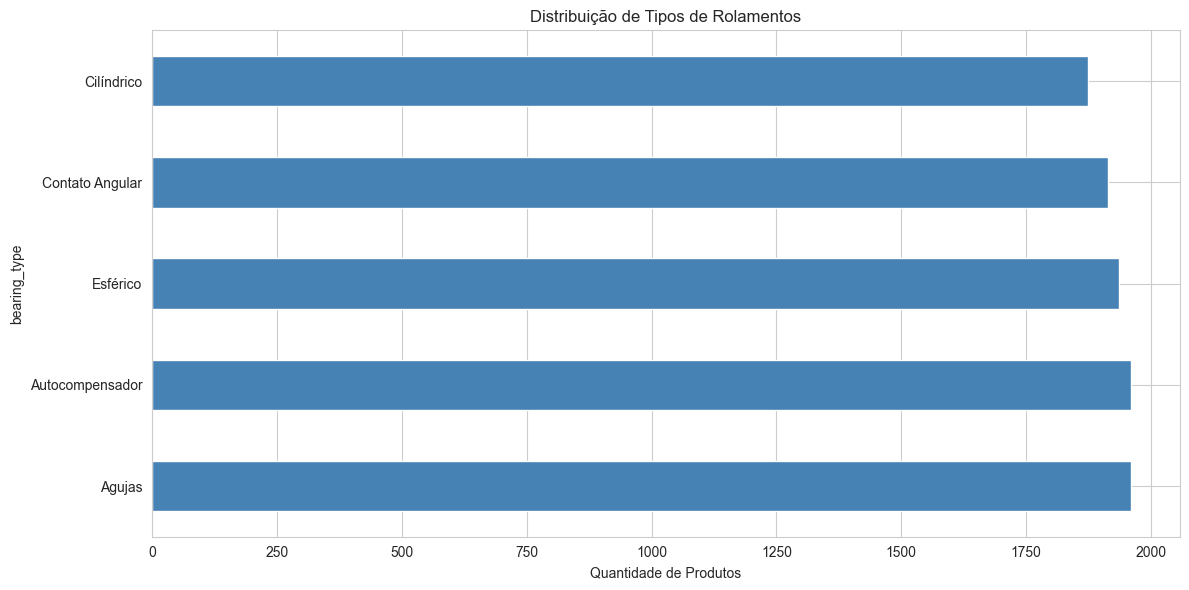


1.2️⃣ DISTRIBUIÇÃO DE MATERIAIS
material
Cerâmica          3247
Aço               3214
Aço Inoxidável    3180
Name: count, dtype: int64


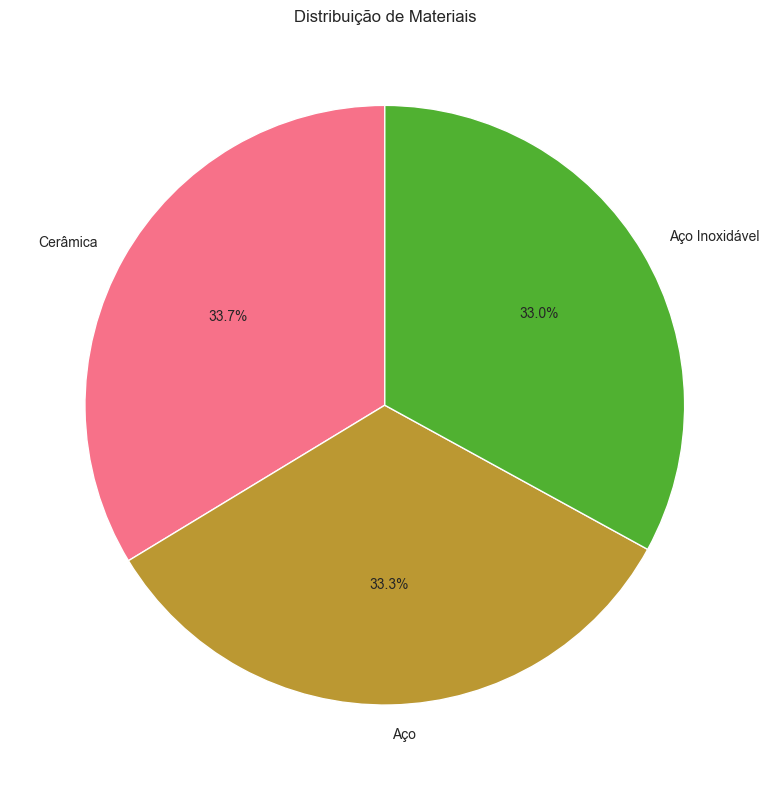


1.3️⃣ CAPACIDADE DE CARGA (N)
count     9641.000000
mean     25053.188112
std      14294.163917
min        502.970000
25%      12517.670000
50%      25096.960000
75%      37405.930000
max      49999.890000
Name: load_capacity, dtype: float64


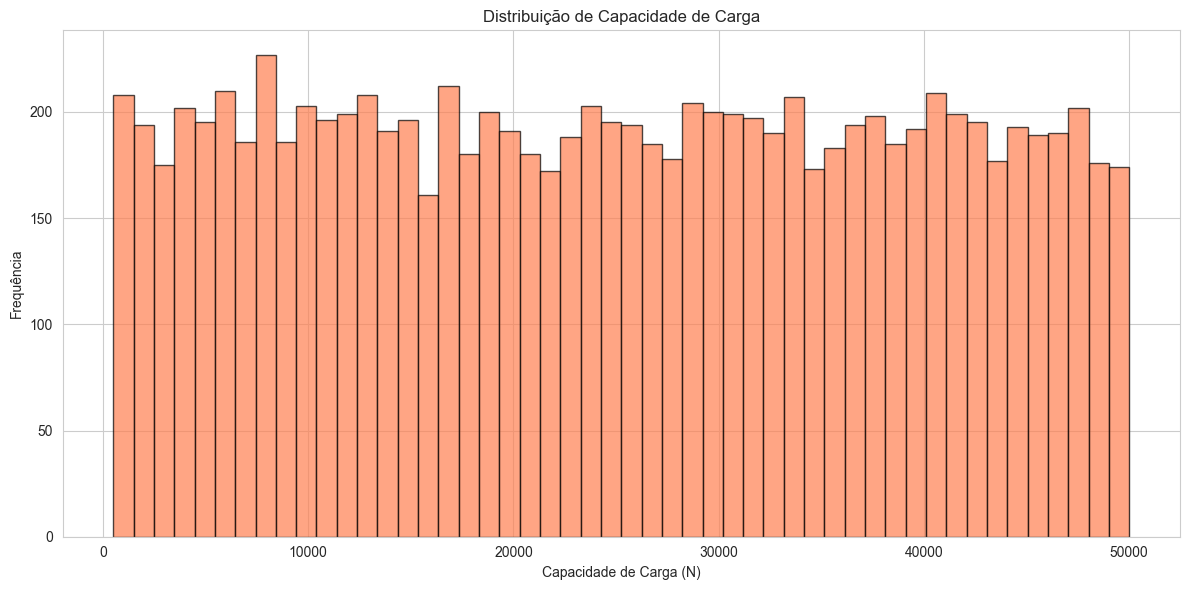


1.4️⃣ VELOCIDADE MÁXIMA (RPM)
count     9641.000000
mean      8047.238150
std       4038.930612
min       1008.000000
25%       4554.000000
50%       8052.000000
75%      11568.000000
max      14998.000000
Name: max_speed, dtype: float64


AttributeError: 'list' object has no attribute 'set_facecolor'

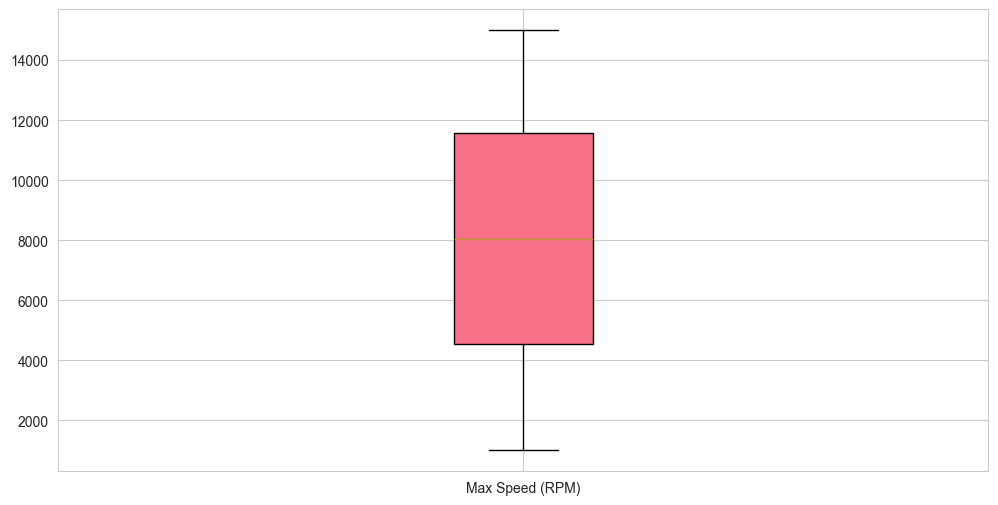

In [3]:
print("\n" + "=" * 80)
print("SEÇÃO 1: ANÁLISE DE PRODUTOS")
print("=" * 80)

# ===== 1.1 Distribuição de Tipos de Rolamentos =====
print("\n1.1️⃣ DISTRIBUIÇÃO DE TIPOS DE ROLAMENTOS")
bearing_counts = products_ml['bearing_type'].value_counts()
print(bearing_counts)

fig, ax = plt.subplots(figsize=(12, 6))
bearing_counts.plot(kind='barh', ax=ax, color='steelblue')
ax.set_xlabel('Quantidade de Produtos')
ax.set_title('Distribuição de Tipos de Rolamentos')
plt.tight_layout()
plt.show()

# ===== 1.2 Distribuição de Materiais =====
print("\n1.2️⃣ DISTRIBUIÇÃO DE MATERIAIS")
materials = products_ml['material'].value_counts()
print(materials)

fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(materials, labels=materials.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Distribuição de Materiais')
plt.tight_layout()
plt.show()

# ===== 1.3 Capacidade de Carga =====
print("\n1.3️⃣ CAPACIDADE DE CARGA (N)")
print(products_ml['load_capacity'].describe())

fig, ax = plt.subplots(figsize=(12, 6))
products_ml['load_capacity'].hist(bins=50, ax=ax, color='coral', edgecolor='black', alpha=0.7)
ax.set_xlabel('Capacidade de Carga (N)')
ax.set_ylabel('Frequência')
ax.set_title('Distribuição de Capacidade de Carga')
plt.tight_layout()
plt.show()

# ===== 1.4 Velocidade Máxima =====
print("\n1.4️⃣ VELOCIDADE MÁXIMA (RPM)")
print(products_ml['max_speed'].describe())

fig, ax = plt.subplots(figsize=(12, 6))
bp = ax.boxplot([products_ml['max_speed']], labels=['Max Speed (RPM)'], patch_artist=True)
bp['boxes'].set_facecolor('lightblue')
ax.set_ylabel('Velocidade (RPM)')
ax.set_title('Distribuição de Velocidade Máxima')
plt.tight_layout()
plt.show()



1.5️⃣ ANÁLISE DE PREÇOS
Custo Unitário - Min: R$50.03, Max: R$499.95, Média: R$269.78
Preço de Lista - Min: R$200.30, Max: R$2999.97, Média: R$1632.65

Margem de Lucro - Min: 0.3%, Max: 5725.8%, Média: 745.9%


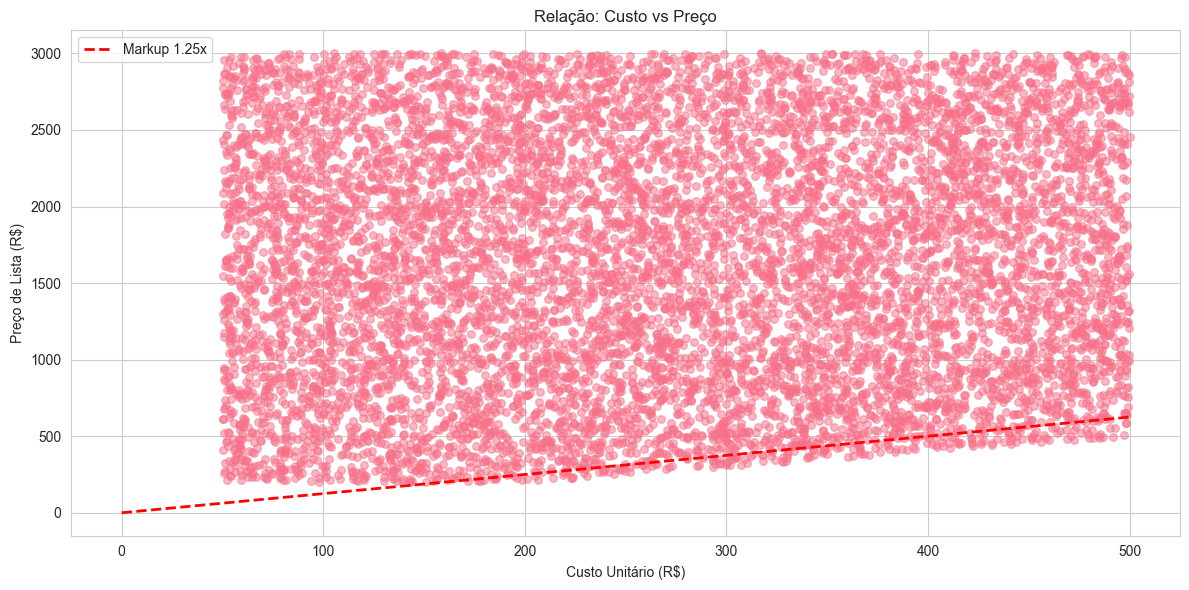


1.6️⃣ PROBLEMAS TÉCNICOS (Features Binárias)


UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

In [4]:
# ===== 1.5 Análise de Preços =====
print("\n1.5️⃣ ANÁLISE DE PREÇOS")
print(f"Custo Unitário - Min: R${products_ml['unit_cost'].min():.2f}, "
      f"Max: R${products_ml['unit_cost'].max():.2f}, "
      f"Média: R${products_ml['unit_cost'].mean():.2f}")
print(f"Preço de Lista - Min: R${products_ml['list_price'].min():.2f}, "
      f"Max: R${products_ml['list_price'].max():.2f}, "
      f"Média: R${products_ml['list_price'].mean():.2f}")

# Margem de lucro
products_ml['profit_margin'] = (
    (products_ml['list_price'] - products_ml['unit_cost']) / 
    products_ml['unit_cost'] * 100
)
print(f"\nMargem de Lucro - Min: {products_ml['profit_margin'].min():.1f}%, "
      f"Max: {products_ml['profit_margin'].max():.1f}%, "
      f"Média: {products_ml['profit_margin'].mean():.1f}%")

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(products_ml['unit_cost'], products_ml['list_price'], alpha=0.5, s=30)
# Adicionar linha de referência (markup = 1.25)
max_cost = products_ml['unit_cost'].max()
ax.plot([0, max_cost], [0, max_cost*1.25], 'r--', label='Markup 1.25x', linewidth=2)
ax.set_xlabel('Custo Unitário (R$)')
ax.set_ylabel('Preço de Lista (R$)')
ax.set_title('Relação: Custo vs Preço')
ax.legend()
plt.tight_layout()
plt.show()

# ===== 1.6 Problemas Técnicos por Produto =====
print("\n1.6️⃣ PROBLEMAS TÉCNICOS (Features Binárias)")
problem_cols = [c for c in products_ml.columns if c.startswith('problem_')]
problem_counts = products_ml[problem_cols].sum().sort_values(ascending=False)
print(problem_counts)

fig, ax = plt.subplots(figsize=(12, 6))
problem_counts.plot(kind='barh', ax=ax, color='mediumseagreen')
ax.set_xlabel('Quantidade de Produtos')
ax.set_title('Problemas que os Produtos Resolvem')
plt.tight_layout()
plt.show()

# ===== 1.7 Correlação entre Atributos Técnicos =====
print("\n1.7️⃣ CORRELAÇÃO ENTRE ATRIBUTOS TÉCNICOS")
technical_cols = ['load_capacity', 'max_speed', 'temperature_limit', 
                 'unit_cost', 'list_price']
corr_matrix = products_ml[technical_cols].corr()
print(corr_matrix)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            ax=ax, square=True, linewidths=1)
ax.set_title('Correlação entre Atributos Técnicos')
plt.tight_layout()
plt.show()


In [ ]:
print("\n" + "=" * 80)
print("SEÇÃO 2: ANÁLISE DE CLIENTES")
print("=" * 80)

# ===== 2.1 Distribuição por Indústria =====
print("\n2.1️⃣ DISTRIBUIÇÃO POR INDÚSTRIA")
industry_counts = customers_ml['industry'].value_counts()
print(industry_counts)

fig, ax = plt.subplots(figsize=(12, 6))
industry_counts.plot(kind='barh', ax=ax, color='lightcoral')
ax.set_xlabel('Quantidade de Clientes')
ax.set_title('Distribuição de Clientes por Indústria')
plt.tight_layout()
plt.show()

# ===== 2.2 Tamanho das Empresas =====
print("\n2.2️⃣ TAMANHO DAS EMPRESAS")
size_counts = customers_ml['company_size'].value_counts()
print(size_counts)

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
ax.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', 
       colors=colors, startangle=90)
ax.set_title('Distribuição por Tamanho de Empresa')
plt.tight_layout()
plt.show()

# ===== 2.3 Modelo de Manutenção =====
print("\n2.3️⃣ MODELO DE MANUTENÇÃO PREFERIDO")
maintenance = customers_ml['maintenance_model'].value_counts()
print(maintenance)

fig, ax = plt.subplots(figsize=(10, 6))
maintenance.plot(kind='bar', ax=ax, color='skyblue')
ax.set_xlabel('Modelo de Manutenção')
ax.set_ylabel('Quantidade de Clientes')
ax.set_title('Modelo de Manutenção por Cliente')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# ===== 2.4 Criticalidade do Equipamento =====
print("\n2.4️⃣ CRITICALIDADE DO EQUIPAMENTO")
criticality = customers_ml['equipment_criticality'].value_counts()
print(criticality)

fig, ax = plt.subplots(figsize=(10, 6))
criticality.plot(kind='bar', ax=ax, color=['#ff4444', '#ffaa44', '#44ff44'])
ax.set_xlabel('Nível de Criticidade')
ax.set_ylabel('Quantidade de Clientes')
ax.set_title('Distribuição de Criticidade do Equipamento')
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# ===== 2.5 Receita Estimada =====
print("\n2.5️⃣ RECEITA ANUAL ESTIMADA")
print(customers_ml['annual_revenue_estimated'].describe())

fig, ax = plt.subplots(figsize=(12, 6))
customers_ml['annual_revenue_estimated'].hist(bins=40, ax=ax, color='gold', 
                                               edgecolor='black', alpha=0.7)
ax.set_xlabel('Receita Anual (R$)')
ax.set_ylabel('Frequência')
ax.set_title('Distribuição de Receita Anual Estimada')
plt.tight_layout()
plt.show()

# ===== 2.6 Orçamento de Manutenção =====
print("\n2.6️⃣ ORÇAMENTO ANUAL DE MANUTENÇÃO")
print(customers_ml['maintenance_budget_annual'].describe())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Box plot geral
ax1.boxplot(customers_ml['maintenance_budget_annual'])
ax1.set_ylabel('Orçamento (R$)')
ax1.set_title('Orçamento de Manutenção - Visão Geral')

# Box plot por indústria
industries = customers_ml['industry'].unique()
budget_by_industry = [customers_ml[customers_ml['industry']==ind]['maintenance_budget_annual'].values 
                      for ind in industries]
ax2.boxplot(budget_by_industry, labels=industries)
ax2.set_ylabel('Orçamento (R$)')
ax2.set_title('Orçamento de Manutenção por Indústria')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ===== 2.7 Custo de Downtime =====
print("\n2.7️⃣ CUSTO DE DOWNTIME POR HORA")
print(customers_ml['downtime_cost_per_hour'].describe())

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(customers_ml['annual_revenue_estimated'], 
          customers_ml['downtime_cost_per_hour'], 
          alpha=0.6, s=40, c=customers_ml['maintenance_budget_annual'], 
          cmap='viridis')
ax.set_xlabel('Receita Anual (R$)')
ax.set_ylabel('Custo de Downtime (R$/h)')
ax.set_title('Receita vs Custo de Downtime')
cbar = plt.colorbar(ax.collections)
cbar.set_label('Orçamento Manutenção (R$)')
plt.tight_layout()
plt.show()

# ===== 2.8 Problemas Esperados por Indústria =====
print("\n2.8️⃣ PROBLEMAS ESPERADOS POR INDÚSTRIA")
problem_cols = [c for c in customers_ml.columns if c.startswith('problem_')]
industrias = sorted(customers_ml['industry'].unique())

problem_by_industry = pd.DataFrame()
for ind in industrias:
    problem_by_industry[ind] = customers_ml[customers_ml['industry']==ind][problem_cols].sum()

print(problem_by_industry)

fig, ax = plt.subplots(figsize=(12, 6))
problem_by_industry.T.plot(kind='bar', ax=ax, width=0.8)
ax.set_xlabel('Indústria')
ax.set_ylabel('Frequência de Problema')
ax.set_title('Problemas Esperados por Indústria')
ax.legend(title='Problemas', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
print("\n" + "=" * 80)
print("SEÇÃO 3: ANÁLISE DE VENDAS")
print("=" * 80)

# ===== 3.1 Série Temporal =====
print("\n3.1️⃣ SÉRIE TEMPORAL DE VENDAS")
daily_sales = sales.groupby('sale_date')['total_price'].sum().sort_index()
print(f"Total de vendas: R$ {daily_sales.sum():,.2f}")
print(f"Média diária: R$ {daily_sales.mean():,.2f}")
print(f"Máximo diário: R$ {daily_sales.max():,.2f}")

fig, ax = plt.subplots(figsize=(14, 6))
daily_sales.plot(ax=ax, color='darkblue', linewidth=1.5)
ax.fill_between(daily_sales.index, daily_sales, alpha=0.3)
ax.set_xlabel('Data')
ax.set_ylabel('Vendas (R$)')
ax.set_title('Série Temporal: Vendas Diárias')
plt.tight_layout()
plt.show()

# ===== 3.2 Vendas por Canal =====
print("\n3.2️⃣ TOTAL DE VENDAS POR CANAL")
channel_sales = sales.groupby('sales_channel')['total_price'].sum().sort_values(ascending=False)
print(channel_sales)

fig, ax = plt.subplots(figsize=(10, 6))
channel_sales.plot(kind='bar', ax=ax, color='mediumorchid')
ax.set_xlabel('Canal de Vendas')
ax.set_ylabel('Vendas (R$)')
ax.set_title('Total de Vendas por Canal')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# ===== 3.3 Produtos Mais Vendidos =====
print("\n3.3️⃣ TOP 20 PRODUTOS MAIS VENDIDOS (POR QUANTIDADE)")
top_products_qty = sales.groupby('product_id').agg({
    'quantity': 'sum',
    'total_price': 'sum'
}).sort_values('quantity', ascending=False).head(20)
print(top_products_qty)

# Merge com nomes dos produtos
top_products_names = top_products_qty.copy()
top_products_names.index = top_products_names.index.map(
    lambda x: products_ml[products_ml['product_id']==x]['product_name'].values 
    if x in products_ml['product_id'].values else x
)

fig, ax = plt.subplots(figsize=(12, 8))
top_products_names['quantity'].plot(kind='barh', ax=ax, color='teal')
ax.set_xlabel('Quantidade Vendida')
ax.set_title('Top 20 Produtos - Quantidade Vendida')
plt.tight_layout()
plt.show()

# ===== 3.4 Clientes com Maior Volume =====
print("\n3.4️⃣ TOP 20 CLIENTES (POR RECEITA)")
top_customers = sales.groupby('customer_id')['total_price'].sum().sort_values(ascending=False).head(20)
print(top_customers)

fig, ax = plt.subplots(figsize=(12, 8))
top_customers.plot(kind='barh', ax=ax, color='darkgreen')
ax.set_xlabel('Receita (R$)')
ax.set_title('Top 20 Clientes - Receita Total')
plt.tight_layout()
plt.show()
    

In [ ]:
# ===== 3.5 Ticket Médio =====
print("\n3.5️⃣ TICKET MÉDIO POR CANAL")
avg_ticket = sales.groupby('sales_channel')['total_price'].agg(['mean', 'count'])
avg_ticket.columns = ['Ticket Médio', 'Quantidade de Vendas']
print(avg_ticket)

fig, ax = plt.subplots(figsize=(10, 6))
avg_ticket['Ticket Médio'].plot(kind='bar', ax=ax, color='indianred')
ax.set_xlabel('Canal de Vendas')
ax.set_ylabel('Ticket Médio (R$)')
ax.set_title('Ticket Médio por Canal')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# ===== 3.6 Status de Vendas =====
print("\n3.6️⃣ DISTRIBUIÇÃO DE STATUS DE VENDAS")
status_dist = sales['sale_status'].value_counts()
print(status_dist)

fig, ax = plt.subplots(figsize=(10, 8))
colors_status = ['#66bb6a', '#ef5350', '#ffa726']
ax.pie(status_dist, labels=status_dist.index, autopct='%1.1f%%', 
       colors=colors_status[:len(status_dist)], startangle=90)
ax.set_title('Distribuição de Status das Vendas')
plt.tight_layout()
plt.show()

# ===== 3.7 Taxa de Conversão =====
print("\n3.7️⃣ TAXA DE CONVERSÃO POR CANAL")
conversao = (sales[sales['sale_status']=='Concluída'].groupby('sales_channel').size() / 
             sales.groupby('sales_channel').size() * 100).sort_values(ascending=False)
print(conversao)

fig, ax = plt.subplots(figsize=(10, 6))
conversao.plot(kind='bar', ax=ax, color='skyblue')
ax.set_xlabel('Canal de Vendas')
ax.set_ylabel('Taxa de Conversão (%)')
ax.set_title('Taxa de Conversão por Canal')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# ===== 3.8 Condições de Pagamento =====
print("\n3.8️⃣ DISTRIBUIÇÃO DE CONDIÇÕES DE PAGAMENTO")
payment_dist = sales['payment_terms'].value_counts()
print(payment_dist)

fig, ax = plt.subplots(figsize=(12, 6))
payment_dist.plot(kind='barh', ax=ax, color='mediumpurple')
ax.set_xlabel('Quantidade de Vendas')
ax.set_title('Distribuição de Condições de Pagamento')
plt.tight_layout()
plt.show()


In [ ]:
print("\n" + "=" * 80)
print("SEÇÃO 4: ANÁLISE CRUZADA (PRODUTO × CLIENTE)")
print("=" * 80)

# ===== 4.1 Problemas por Indústria =====
print("\n4.1️⃣ QUAL PROBLEMA CADA INDÚSTRIA PREFERE RESOLVER?")

sales_enriched = sales.merge(
    customers_ml[['customer_id', 'industry']], 
    on='customer_id', 
    how='left'
)
sales_enriched = sales_enriched.merge(
    products_ml[['product_id', 'problem_type']], 
    on='product_id',
    how='left'
)

industry_problem = sales_enriched.groupby(['industry', 'problem_type']).size().unstack(fill_value=0)
print(industry_problem)

fig, ax = plt.subplots(figsize=(12, 6))
industry_problem.plot(kind='bar', ax=ax, width=0.8)
ax.set_xlabel('Indústria')
ax.set_ylabel('Quantidade de Vendas')
ax.set_title('Problemas Resolvidos por Indústria')
ax.legend(title='Tipo de Problema', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# ===== 4.2 Produtos de Alto Custo vs Volume =====
print("\n4.2️⃣ PRODUTOS PREMIUM: PREÇO vs VOLUME DE VENDAS")

high_cost_products = products_ml[products_ml['list_price'] > products_ml['list_price'].quantile(0.75)]
high_cost_sales_vol = sales[sales['product_id'].isin(high_cost_products['product_id'])].groupby('product_id').size()

high_cost_prices = products_ml[products_ml['product_id'].isin(high_cost_sales_vol.index)].set_index('product_id')['list_price']

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(high_cost_prices, high_cost_sales_vol, s=100, alpha=0.6, c=range(len(high_cost_prices)), cmap='plasma')
ax.set_xlabel('Preço de Lista (R$)')
ax.set_ylabel('Volume de Vendas')
ax.set_title('Produtos Premium: Preço vs Volume')
plt.tight_layout()
plt.show()

# ===== 4.3 Rentabilidade por Produto =====
print("\n4.3️⃣ TOP 20 PRODUTOS POR RENTABILIDADE (MARGEM TOTAL)")

sales_with_cost = sales.merge(
    products_ml[['product_id', 'unit_cost', 'list_price']], 
    on='product_id',
    how='left'
)
sales_with_cost['margin'] = (sales_with_cost['total_price'] - 
                             (sales_with_cost['quantity'] * sales_with_cost['unit_cost']))
product_profitability = sales_with_cost.groupby('product_id')['margin'].sum().sort_values(ascending=False).head(20)

print(product_profitability)

fig, ax = plt.subplots(figsize=(12, 8))
product_profitability.plot(kind='barh', ax=ax, color='forestgreen')
ax.set_xlabel('Margem Total (R$)')
ax.set_title('Top 20 Produtos - Rentabilidade')
plt.tight_layout()
plt.show()

# ===== 4.4 Matriz Produto-Problema =====
print("\n4.4️⃣ MATRIZ: QUAL PRODUTO RESOLVE QUAL PROBLEMA?")

product_problem_matrix = pd.crosstab(
    products_ml['problem_type'],
    products_ml['bearing_type']
)
print(product_problem_matrix)

fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(product_problem_matrix, annot=True, fmt='d', cmap='YlOrRd', ax=ax, cbar_kws={'label': 'Produtos'})
ax.set_title('Matriz: Tipo de Rolamento vs Problema Técnico')
plt.tight_layout()
plt.show()


In [ ]:
print("\n" + "=" * 80)
print("SEÇÃO 5: INSIGHTS E RECOMENDAÇÕES")
print("=" * 80)

# ===== INSIGHT 1: Produtos com baixa performance =====
print("\n💡 INSIGHT 1: PRODUTOS COM BAIXA PERFORMANCE")
low_performance = sales.groupby('product_id').size().sort_values().head(10)
print(f"\n{len(low_performance)} produtos com as menores vendas:")
for prod_id, qty in low_performance.items():
    prod_name = products_ml[products_ml['product_id']==prod_id]['product_name'].values
    print(f"  - {prod_name}: {qty} vendas")

# ===== INSIGHT 2: Clientes com alto potencial =====
print("\n💡 INSIGHT 2: CLIENTES COM MAIOR POTENCIAL")
high_value = sales.groupby('customer_id')['total_price'].sum().sort_values(ascending=False).head(10)
print(f"\nTop 10 clientes (receita):")
for cust_id, revenue in high_value.items():
    cust_name = customers_ml[customers_ml['customer_id']==cust_id]['company_name'].values
    print(f"  - {cust_name}: R$ {revenue:,.2f}")

# ===== INSIGHT 3: Indústrias mais lucrativas =====
print("\n💡 INSIGHT 3: INDÚSTRIAS MAIS LUCRATIVAS")
industry_revenue = sales_enriched.groupby('industry')['total_price'].sum().sort_values(ascending=False)
print(f"\nReceita por indústria:")
for ind, rev in industry_revenue.items():
    pct = rev / industry_revenue.sum() * 100
    print(f"  - {ind}: R$ {rev:,.2f} ({pct:.1f}%)")

# ===== INSIGHT 4: Canal mais efetivo =====
print("\n💡 INSIGHT 4: CANAL DE VENDAS MAIS EFETIVO")
channel_effectiveness = sales.groupby('sales_channel').agg({
    'total_price': 'sum',
    'sale_date': 'count'
}).sort_values('total_price', ascending=False)
channel_effectiveness.columns = ['Receita Total', 'Quantidade de Vendas']
channel_effectiveness['Ticket Médio'] = (
    channel_effectiveness['Receita Total'] / channel_effectiveness['Quantidade de Vendas']
)
print(channel_effectiveness)

# ===== INSIGHT 5: Oportunidades de Cross-sell =====
print("\n💡 INSIGHT 5: OPORTUNIDADES DE CROSS-SELL")
print("\nClientes que compram problema_vibracao também compram:")
customers_vib = sales_enriched[sales_enriched['problem_type']=='Vibração']['customer_id'].unique()
other_problems = sales_enriched[sales_enriched['customer_id'].isin(customers_vib)]['problem_type'].value_counts()
print(other_problems)

# ===== INSIGHT 6: Segmentação de Clientes =====
print("\n💡 INSIGHT 6: SEGMENTAÇÃO DE CLIENTES POR VALOR")

# Usar RFM simplificado
customer_value = sales.groupby('customer_id').agg({
    'total_price': 'sum',  # Monetary
    'sale_date': 'count'   # Frequency
}).reset_index()
customer_value.columns = ['customer_id', 'monetary', 'frequency']

# Classificar
customer_value['segment'] = pd.cut(
    customer_value['monetary'], 
    bins=3, 
    labels=['Baixo Valor', 'Médio Valor', 'Alto Valor']
)

segment_dist = customer_value['segment'].value_counts()
print(f"\nDistribuição de clientes por segmento:")
print(segment_dist)

# Merge com dados de cliente
customer_value_enriched = customer_value.merge(
    customers_ml[['customer_id', 'industry', 'maintenance_budget_annual']], 
    on='customer_id'
)

for segment in ['Alto Valor', 'Médio Valor', 'Baixo Valor']:
    segment_data = customer_value_enriched[customer_value_enriched['segment']==segment]
    print(f"\n{segment}:")
    print(f"  - Quantidade: {len(segment_data)}")
    print(f"  - Receita média: R$ {segment_data['monetary'].mean():,.2f}")
    print(f"  - Indústria mais comum: {segment_data['industry'].mode()}")
    print(f"  - Orçamento médio: R$ {segment_data['maintenance_budget_annual'].mean():,.2f}")


In [ ]:
print("\n" + "=" * 80)
print("RESUMO EXECUTIVO")
print("=" * 80)

print(f"""
╔════════════════════════════════════════════════════════════════════════════╗
║ ESTATÍSTICAS GERAIS DO PROJETO                                             ║
╠════════════════════════════════════════════════════════════════════════════╣
║                                                                              ║
║ PRODUTOS:                                                                    ║
║   • Total de produtos: {len(products_ml):,}                                     ║
║   • Tipos de rolamentos: {products_ml['bearing_type'].nunique()}                          ║
║   • Materiais: {products_ml['material'].nunique()}                                  ║
║   • Preço médio: R$ {products_ml['list_price'].mean():,.2f}                            ║
║   • Margem média: {products_ml['profit_margin'].mean():.1f}%                             ║
║                                                                              ║
║ CLIENTES:                                                                    ║
║   • Total de clientes: {len(customers_ml):,}                                     ║
║   • Indústrias: {customers_ml['industry'].nunique()}                                    ║
║   • Receita média estimada: R$ {customers_ml['annual_revenue_estimated'].mean():,.0f}               ║
║   • Orçamento médio de manutenção: R$ {customers_ml['maintenance_budget_annual'].mean():,.2f}        ║
║                                                                              ║
║ VENDAS:                                                                      ║
║   • Total de transações: {len(sales):,}                                    ║
║   • Receita total: R$ {sales['total_price'].sum():,.2f}                           ║
║   • Receita média por transação: R$ {sales['total_price'].mean():,.2f}                  ║
║   • Período: {sales['sale_date'].min().date()} a {sales['sale_date'].max().date()}                ║
║   • Taxa de conclusão: {(sales[sales['sale_status']=='Concluída'].shape/len(sales)*100):.1f}%              ║
║                                                                              ║
╚════════════════════════════════════════════════════════════════════════════╝
""")

print("\n✅ ANÁLISE EXPLORATÓRIA CONCLUÍDA!")
print("\nPróxima etapa: Notebook 05 - ML & Modelo de Similaridade")
